In [491]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib
import tensorflow as tf
import seaborn as sns
sns.set()
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model 
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA as sk_pca
from mpl_toolkits.mplot3d import Axes3D
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from IPython.display import clear_output

In [492]:
import numpy as np
import pandas as pd
import os
a=os.listdir('C:/Users/Utsav Dutta/Desktop/ITC/Tobacco/NIRScanNano')

In [493]:
DF={}
df={}
for y in range(1,141):
    df[y]=pd.DataFrame()
    DF[y]=pd.DataFrame()
    for x in a:
        if int(x.split('Hadamard')[0])==y:
            DF[y]=pd.concat([DF[y],pd.read_csv('C:/Users/Utsav Dutta/Desktop/ITC/Tobacco/NIRScanNano/'+x,skiprows=21)],axis=1)
    df[y]['Wavelength']=DF[y]['Wavelength (nm)'].iloc[:,1]
    df[y]['Absorbance']=DF[y]['Absorbance (AU)'].mean(axis=1)
    df[y]['Intensity']=DF[y]['Sample Signal (unitless)'].mean(axis=1)
    df[y]['Reflectance']=DF[y]['Reference Signal (unitless)'].mean(axis=1)

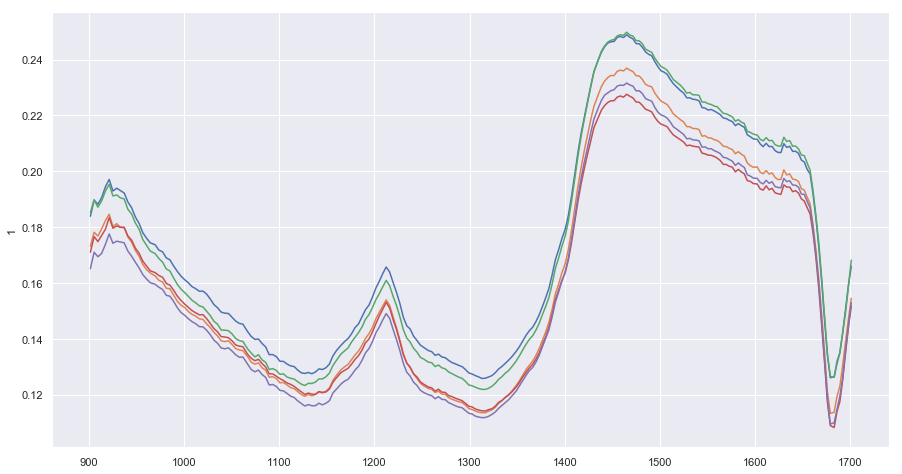

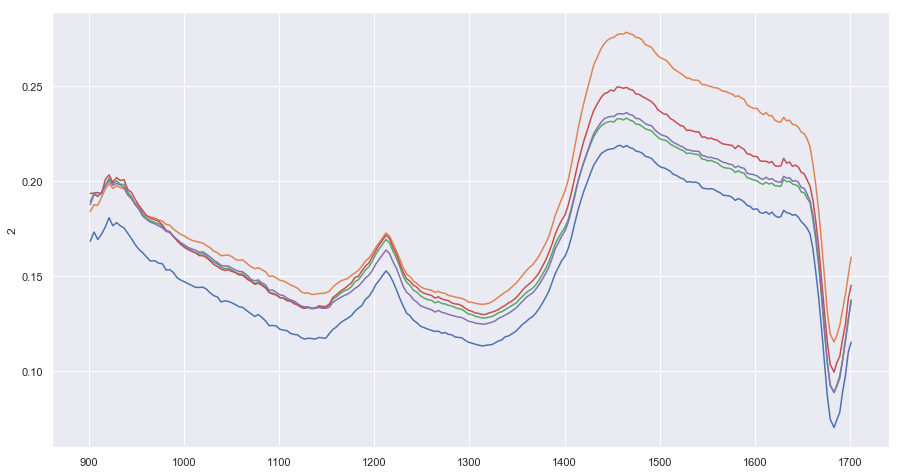

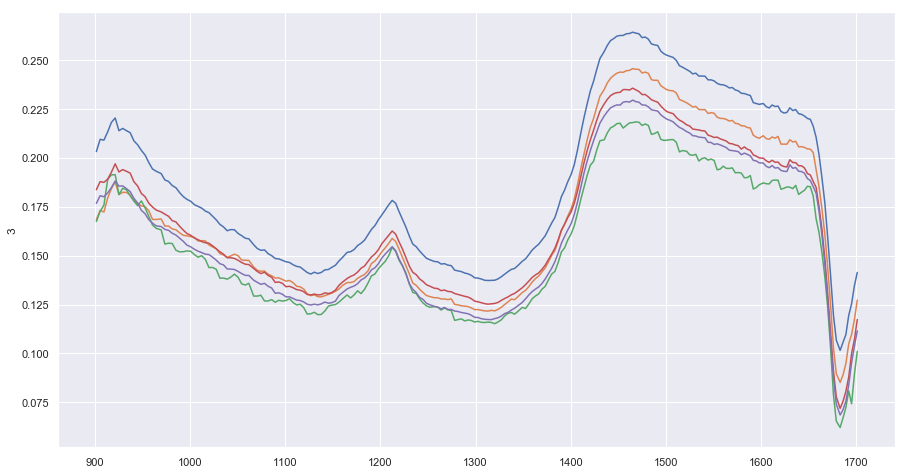

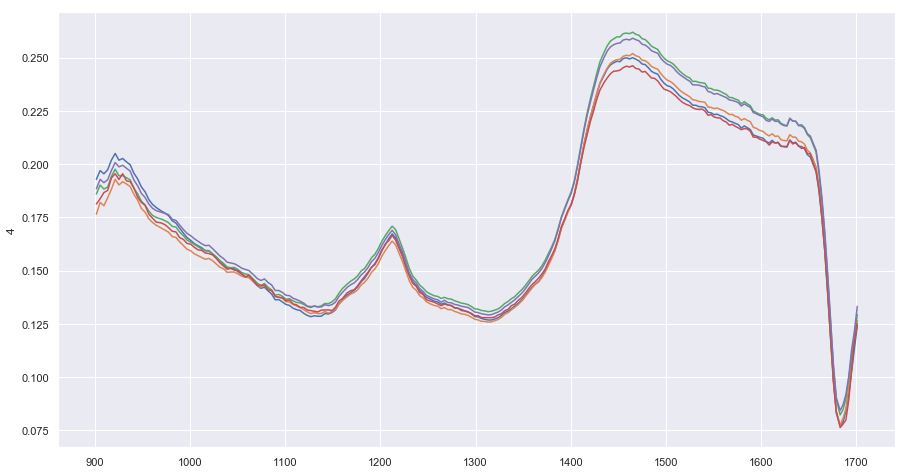

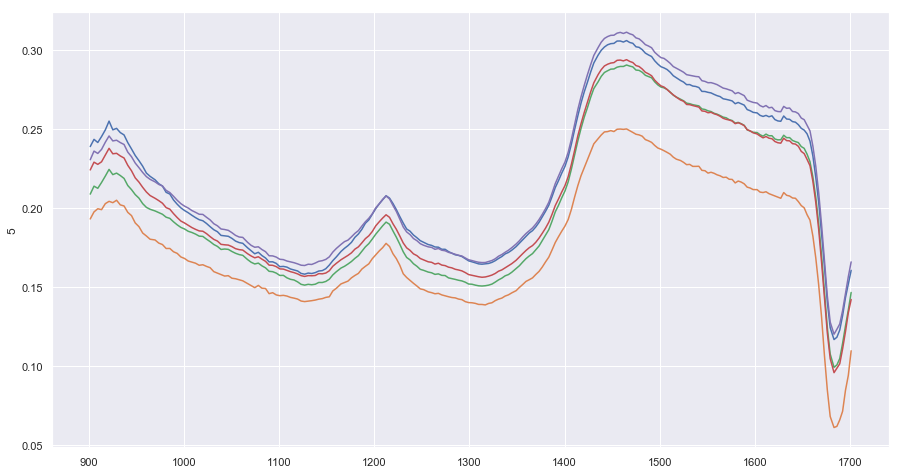

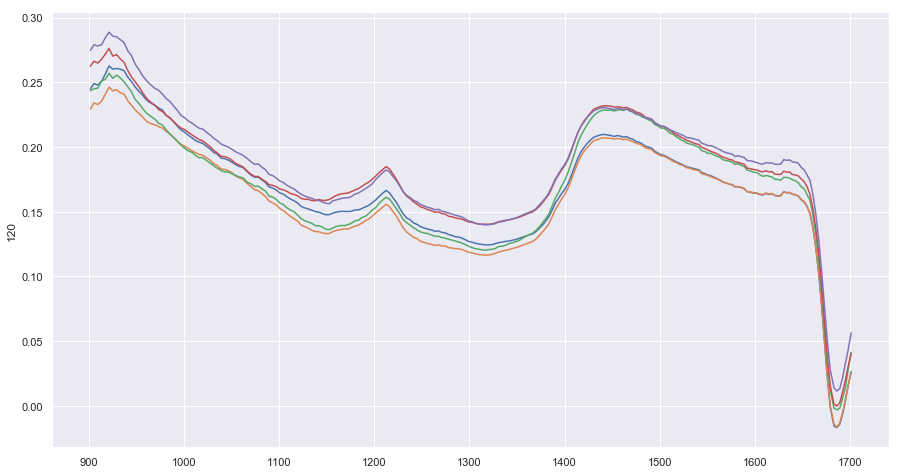

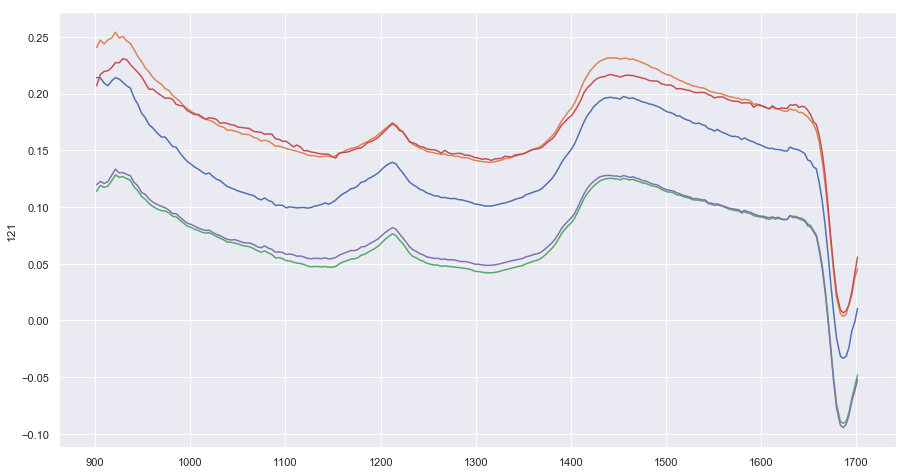

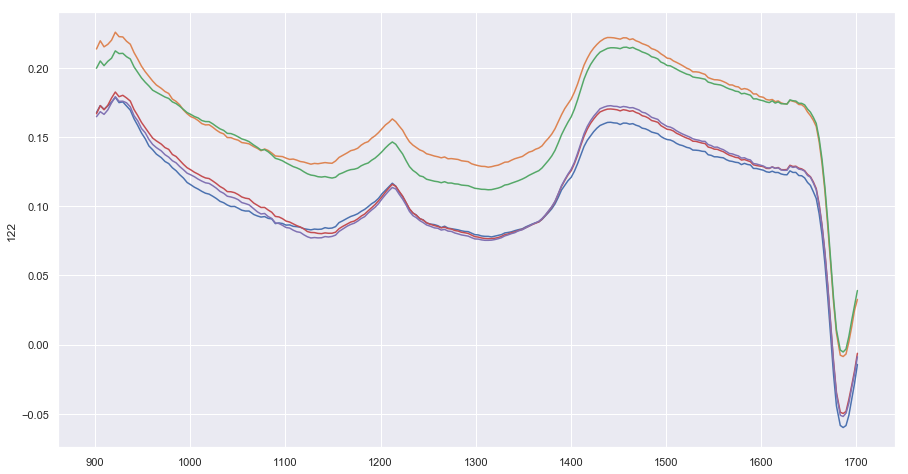

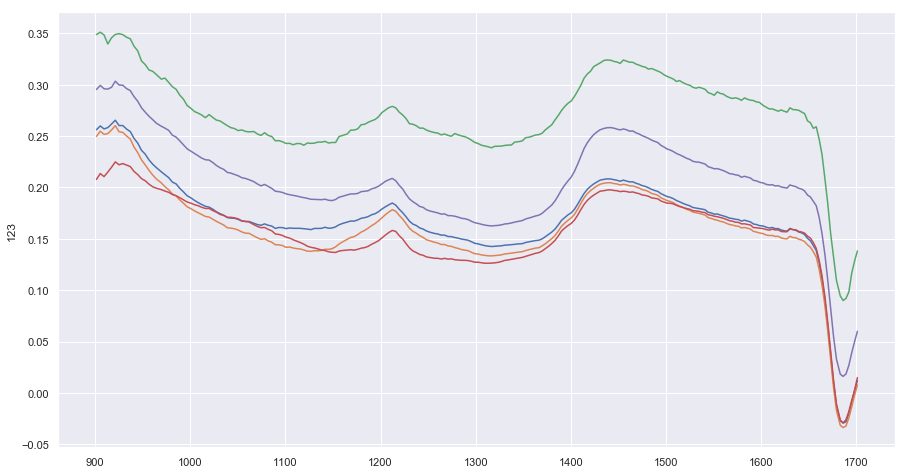

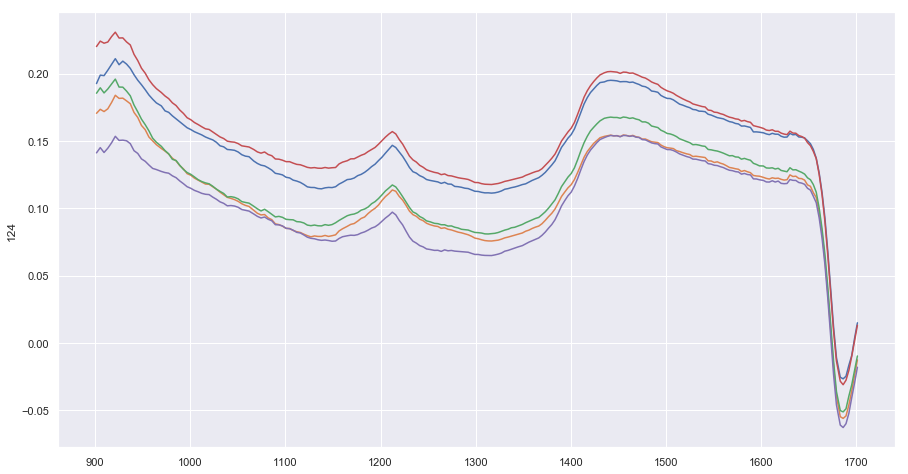

In [416]:
for i in [1,2,3,4,5,120,121,122,123,124]:
    plt.figure(figsize=(15,8))
    plt.plot(DF[i]['Wavelength (nm)'],DF[i].iloc[:,[1,5,9,13,17]])
    plt.ylabel(i)

In [494]:
def combine_spectra_byvariable(a,var):
    b=pd.DataFrame()
    for x in a.keys():
        b=pd.concat([b,pd.DataFrame(data=[list(a[x][var])],columns=a[1]['Wavelength'])],ignore_index=True)
    return b

In [495]:
targets=pd.read_excel(r'C:\Users\Utsav Dutta\Desktop\ITC\Tobacco\Data_And_Codes\Experimental Samples.xlsx',skiprows=1,usecols=[2,3])

In [496]:
targets=targets.convert_objects(convert_numeric=True)

C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [497]:
dfi=pd.concat([combine_spectra_byvariable(df,'Intensity'),targets],axis=1)
dfa=pd.concat([combine_spectra_byvariable(df,'Absorbance'),targets],axis=1)
dfr=pd.concat([combine_spectra_byvariable(df,'Reflectance'),targets],axis=1)

In [423]:
chiabs=pd.read_csv('Chirala_abs.csv').drop(['code'],axis=1)
chiint=pd.read_csv('Chirala_int.csv').drop(['code'],axis=1)

In [426]:
chiabs_n=chiabs.drop(['Sugar','Chloride'],axis=1)

In [615]:
dfan=dfa.drop(['Sugar %'],axis=1).convert_objects(convert_numeric=True)
dfrn=dfr.drop(['Sugar %'],axis=1).convert_objects(convert_numeric=True)
dfin=dfi.drop(['Sugar %'],axis=1).convert_objects(convert_numeric=True)

C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separat

In [616]:
dfas=dfa.drop(['Nicotine %'],axis=1).convert_objects(convert_numeric=True)
dfrs=dfr.drop(['Nicotine %'],axis=1).convert_objects(convert_numeric=True)
dfis=dfi.drop(['Nicotine %'],axis=1).convert_objects(convert_numeric=True)

C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separat

In [617]:
dfan=dfan.rename({'Nicotine %':'Nicotine'},axis=1)

In [501]:
dfan.columns=dfan.columns.map(str)

In [465]:
dfan=pd.concat([dfan,chiabs_n],axis=0)
dfan=dfan.reset_index(drop=True)

In [467]:
dfan.to_excel('Nicotine_Absorbance.xlsx')
dfas.to_excel('Sugar_Absorbance.xlsx')

# Functions

In [502]:
def Plot(a):
    plt.figure(figsize=(20,10))
    plt.plot([round(x) for x in list(a.columns[:-1].astype(float))],a.iloc[:,:-1].T)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.xlabel('Wavelength in nm',fontsize=30)

def snv(y):
    x=y.copy(deep=True)
    for i in range(x.shape[0]):
        x.iloc[i,:-1] = (x.iloc[i,:-1] - np.mean(x.iloc[i,:-1])) / np.std(x.iloc[i,:-1])
    return x

def msc(input_data_, reference=None):
    
    # mean centre correction
    input_data=input_data_.values[:,:-1]
    for i in range(input_data.shape[0]):
        input_data[i,:] -= input_data[i,:].mean()
    
    if reference is None:    
        # Calculate mean
        ref = np.mean(input_data, axis=0)
    else:
        ref = reference
    ref = np.mean(input_data, axis=0)
    

    # Define a new array and populate it with the corrected data    
    data_msc = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
        # Run regression
        fit = np.polyfit(ref, input_data[i,:], 1, full=True)
        # Apply correction
        data_msc[i,:] = (input_data[i,:] - fit[0][1]) / fit[0][0] 
    p=pd.DataFrame(data_msc)
    p['target']=input_data_.iloc[:,-1]
    return (p)

def msc_ref(input_data_, reference=None):
    
    # mean centre correction
    input_data=input_data_.values[:,:-1]
    for i in range(input_data.shape[0]):
        input_data[i,:] -= input_data[i,:].mean()
    
    if reference is None:    
        # Calculate mean
        ref = np.mean(input_data, axis=0)
    else:
        ref = reference
    ref = np.mean(input_data, axis=0)
    

    # Define a new array and populate it with the corrected data    
    data_msc = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
        # Run regression
        fit = np.polyfit(ref, input_data[i,:], 1, full=True)
        # Apply correction
        data_msc[i,:] = (input_data[i,:] - fit[0][1]) / fit[0][0] 
    p=pd.DataFrame(data_msc)
    p['target']=input_data_.iloc[:,-1]
    return (ref)

def deriv(x,y):
    a=x.copy(deep=True)
    a.iloc[:,:-1] = savgol_filter(a.iloc[:,:-1], 25, polyorder = 3,deriv=y)
    
    return a

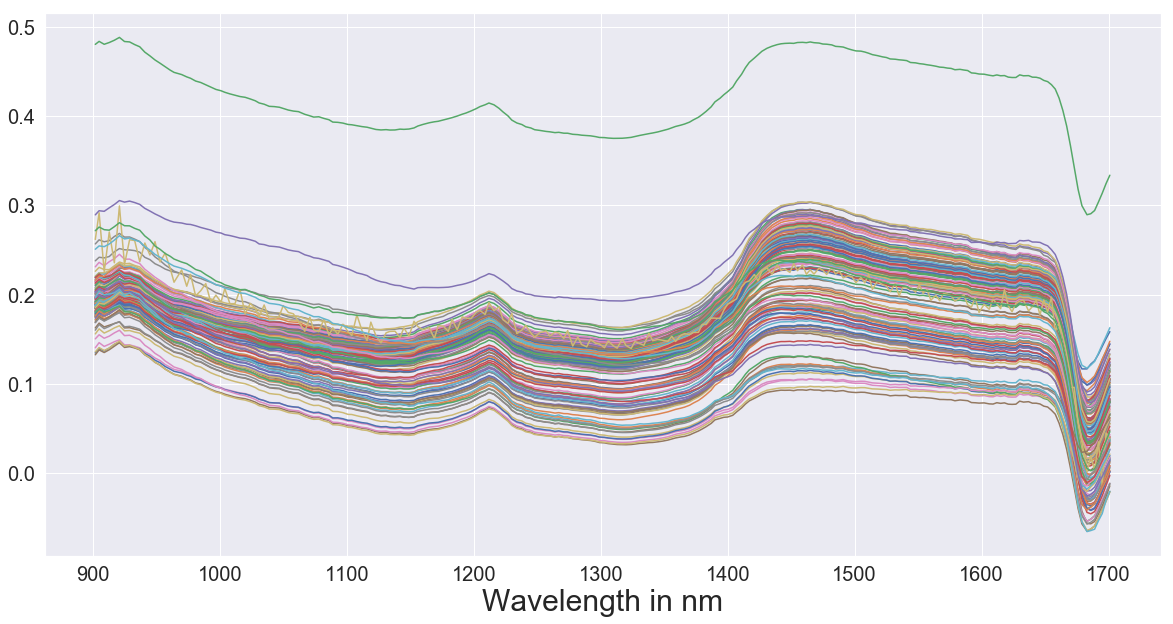

In [510]:
Plot(dfan)

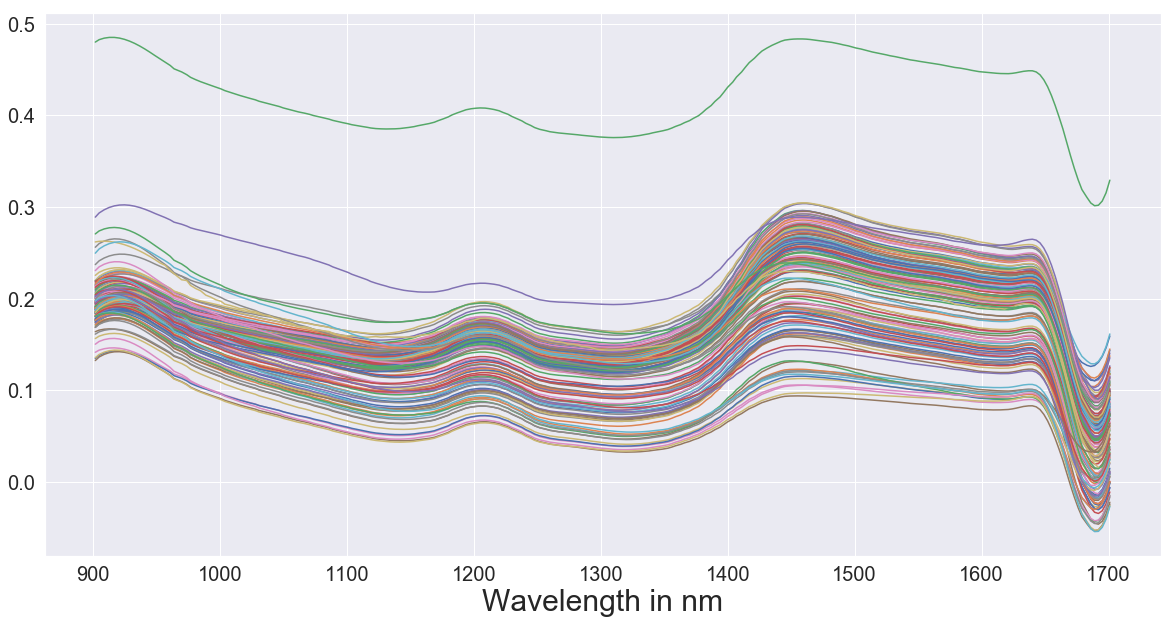

In [514]:
Plot(deriv(dfan,0))

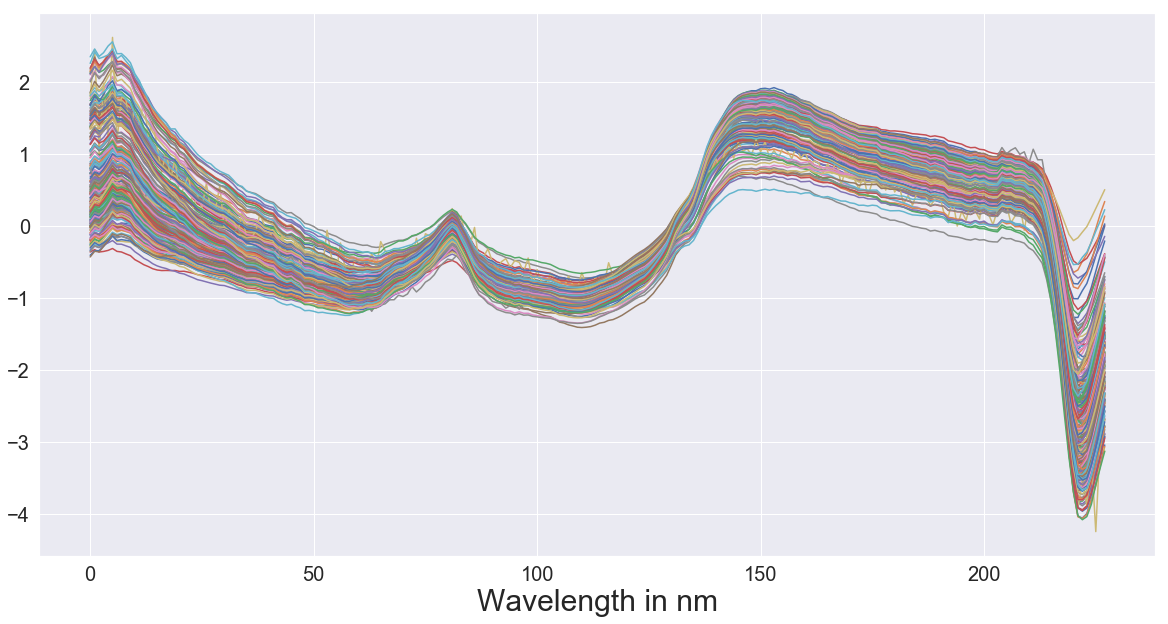

In [472]:
Plot(snv(msc(dfan)))

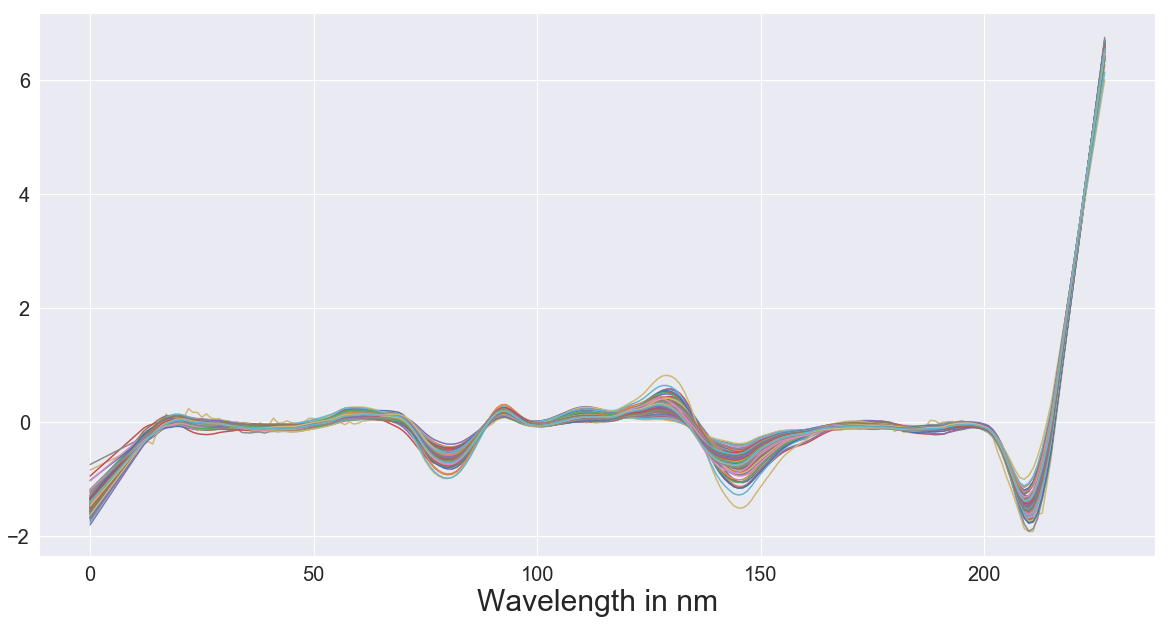

In [474]:
Plot(snv(msc(deriv(dfan,2))))

# Partial Least Squares Regression

In [475]:
import math

In [564]:
from sklearn.cross_decomposition import PLSRegression
def pls(a,pc):
    X=a.iloc[:,:-1].copy(deep=True)
    y=a.iloc[:,-1].copy(deep=True)
    
    # Define the PCA object
    pls = PLSRegression(n_components=pc)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=model_selection.LeaveOneOut())
    
    # Calculate scores for calibration and cross-validation
    score_cv = r2_score(y, y_cv)
    
    #Calculate mean square error for calibration and cross validation
   
    mse_cv = mean_squared_error(y, y_cv)
    adjusted_r2=1-(1-r2_score(y,y_cv))*((X.shape[0]-1)/(X.shape[0]-pc-1))
    
    return(y_cv, score_cv, mse_cv,adjusted_r2)

In [560]:
sugars=dfas[dfas['Sugar %']>5]

In [562]:
snv(deriv(sugars,1))

,901.509379,905.4731390000001,909.4326480000001,913.387905,917.3389119999999,921.285667,925.2281720000001,929.166425,933.100428,937.0301789999999,...,1676.173748,1679.19519,1683.2171670000002,1686.22869,1689.2359620000002,1692.2389829999997,1695.237753,1698.232271,1701.222539,Sugar %
0,1.214997,0.948394,0.700615,0.471661,0.261531,0.070226,-0.102255,-0.255912,-0.390744,-0.506752,...,-2.021964,-1.474733,-0.816978,-0.048698,0.830106,1.819435,2.919289,4.129667,5.450570,13.3
1,1.340075,1.065524,0.810533,0.575101,0.359229,0.162916,-0.013838,-0.171032,-0.308667,-0.426743,...,-2.537623,-1.963391,-1.266353,-0.446511,0.496137,1.561591,2.749850,4.060914,5.494784,13.4
2,1.556373,1.240279,0.947238,0.677250,0.430315,0.206433,0.005604,-0.172172,-0.326895,-0.458565,...,-2.850509,-2.295969,-1.616887,-0.813263,0.114904,1.167612,2.344863,3.646656,5.072991,14.3
3,1.298366,1.029515,0.780267,0.550624,0.340586,0.150151,-0.020679,-0.171905,-0.303527,-0.415544,...,-2.846447,-2.279839,-1.586845,-0.767466,0.178298,1.250448,2.448982,3.773902,5.225207,14.8
4,1.362680,1.071781,0.801991,0.553313,0.325744,0.119286,-0.066062,-0.230299,-0.373426,-0.495443,...,-2.920714,-2.382523,-1.721241,-0.936867,-0.029402,1.001154,2.154803,3.431542,4.831374,14.9
5,1.391655,1.107077,0.843327,0.600405,0.378311,0.177045,-0.003394,-0.163005,-0.301788,-0.419743,...,-3.138579,-2.584531,-1.901339,-1.089002,-0.147521,0.923104,2.122874,3.451788,4.909846,15.3
6,1.443519,1.144281,0.867278,0.612511,0.379980,0.169685,-0.018375,-0.184199,-0.327787,-0.449139,...,-3.286534,-2.732634,-2.046875,-1.229256,-0.279777,0.801561,2.014758,3.359815,4.836732,12.2
7,1.275122,1.006190,0.757277,0.528381,0.319502,0.130642,-0.038200,-0.187025,-0.315832,-0.424621,...,-3.198213,-2.663893,-2.002238,-1.213251,-0.296929,0.746725,1.917714,3.216036,4.641692,13.2
8,1.444760,1.148721,0.874513,0.622135,0.391588,0.182871,-0.004015,-0.169070,-0.312295,-0.433689,...,-3.299304,-2.755969,-2.082242,-1.278124,-0.343615,0.721286,1.916579,3.242263,4.698338,12.6
9,1.413646,1.118872,0.845869,0.594638,0.365179,0.157490,-0.028426,-0.192572,-0.334946,-0.455548,...,-3.378573,-2.819688,-2.126425,-1.298785,-0.336768,0.759627,1.990399,3.355547,4.855073,11.7


In [588]:
def blah(a,x,y):
    plt.scatter(a.iloc[:,-1],pls(snv(deriv(a,x)),y)[0])
    plt.ylabel(pls(snv(deriv(a,x)),y)[1].round(2))

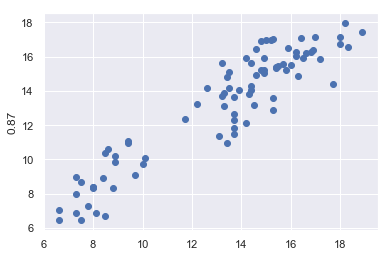

In [589]:
blah(sugars,1,9)

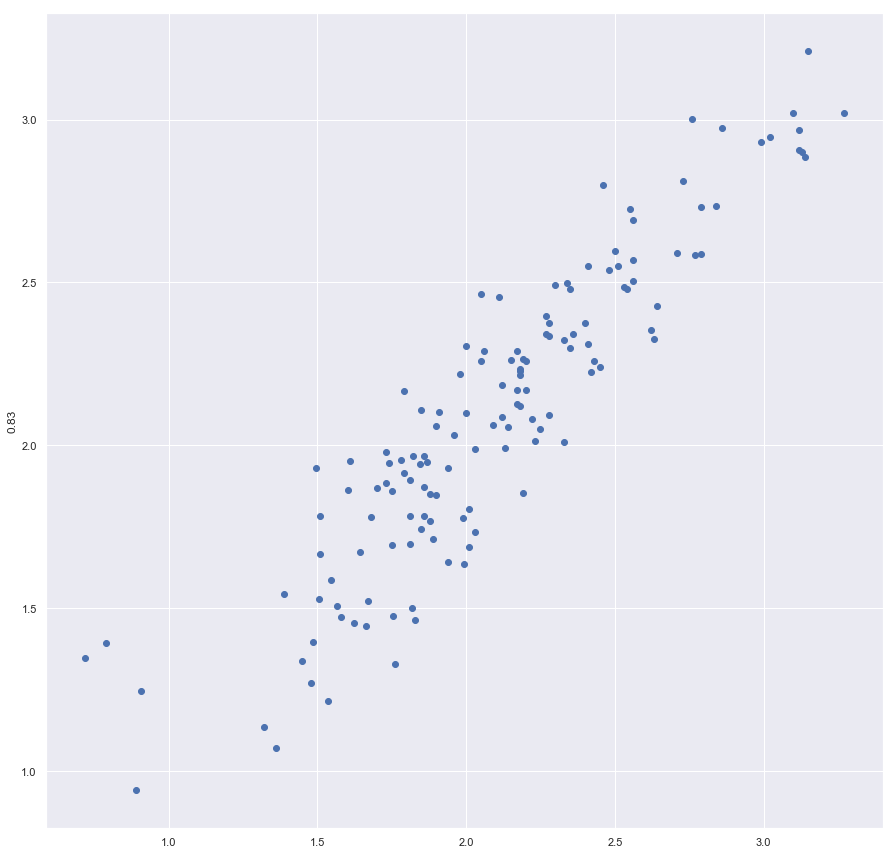

In [627]:
plt.figure(figsize=(15,15))
blah(dfan.drop(118),1,17)

In [610]:
dfan['pred']=pls(snv(deriv(dfan,1)),20)[0]

In [486]:
def plot_r2_pls(x,n,y):    
    plt.figure(figsize=(10,10))
    plt.scatter(np.log(x.iloc[:,-1]),pls(snv(msc(deriv(x,y))),n)[0])
    plt.title('$R^{2}$ (CV): '+str(pls(snv(msc(deriv(x,y))),n)[1]))
    

KeyboardInterrupt: 

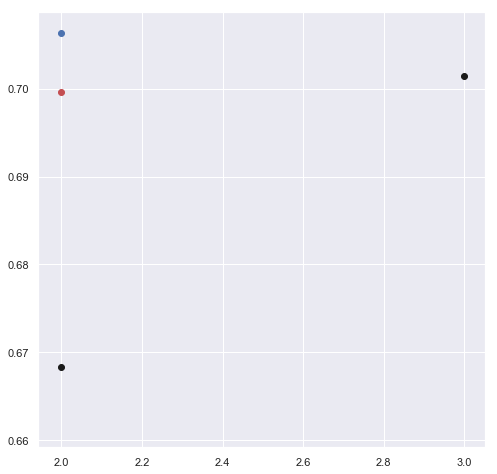

In [38]:
plt.figure(figsize=(8,8))
for i in range(2,45):
    clear_output(wait=True)
    plt.scatter(i,pls(snv(msc(deriv(dfan,1))),i)[1],c='k')
    plt.scatter(i,pls(snv(msc(deriv(dfan,2))),i)[1],c='b')
    plt.scatter(i,pls(snv(msc(deriv(dfan,3))),i)[1],c='r')
    print('Current Progress',np.round(i/45*100,2),'%')
plt.xticks(np.arange(1,40))
plt.xlabel('Number of Principal Components')
plt.ylabel('R2')
plt.ylim(0,1)

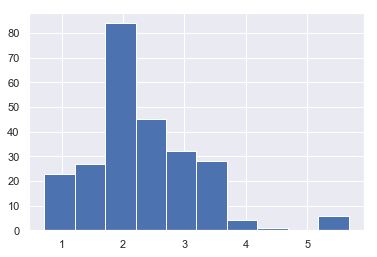

In [490]:
dfan['Nicotine'].hist()

# Principal Components Regression

In [89]:
def pcr(a,pc):
    
    X=a.iloc[:,:-1].copy(deep=True)
    y=a['target'].copy(deep=True)
    
    # Define the PCA object
    pca = PCA()
 
    # Preprocessing (1): first derivative
    #d1X = savgol_filter(X, 25, polyorder = 5, deriv=1)
    d1X=X.copy(deep=True)
    # Preprocess (2) Standardize features by removing the mean and scaling to unit variance
    #Xstd = StandardScaler().fit_transform(d1X[:,:])
 
    # Run PCA producing the reduced variable Xred and select the first pc components
    Xreg = pca.fit_transform(d1X)[:,:pc]
 
    # Create linear regression object
    regr = linear_model.LinearRegression()
    
    # Fit
    regr.fit(Xreg, y)
 
    # Calibration
    y_c = regr.predict(Xreg)
 
    # Cross-validation
    y_cv = cross_val_predict(regr, Xreg, y, cv=10)
 
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
    adjusted_r2=1-(1-r2_score(y,y_cv))*((X.shape[0]-1)/(X.shape[0]-pc-1))
 
    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    
    
    #plt.figure(figsize=(8,8))
    #plt.scatter(y,y_cv)
    #plt.title('$R^{2}$ (CV): '+str(score_cv))
    #plt.xlim(1.6,3.1)
    #plt.ylim(1.6,3.1)
    
    return(y_cv, score_c, score_cv, mse_c, mse_cv,adjusted_r2)

(0, 3)

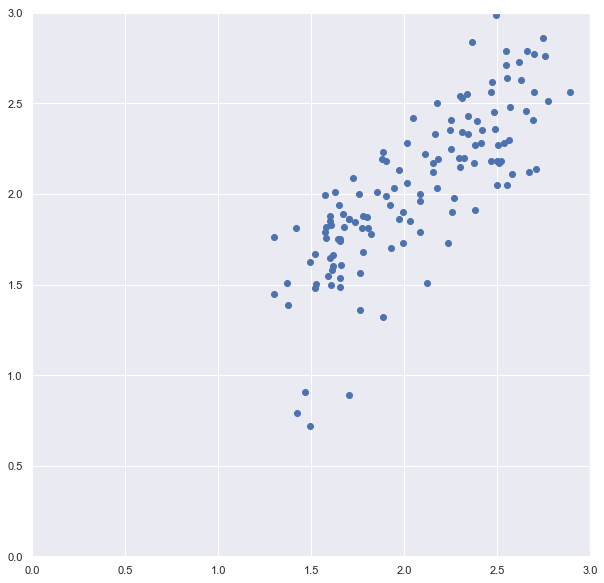

In [93]:
plt.figure(figsize=(10,10))
plt.scatter(pcr(snv(msc(deriv(dfan,2))),11)[0],dfan.iloc[:,-1])

plt.xlim(0,3)
plt.ylim(0,3)

Current Progress 98.0 %


(0, 1)

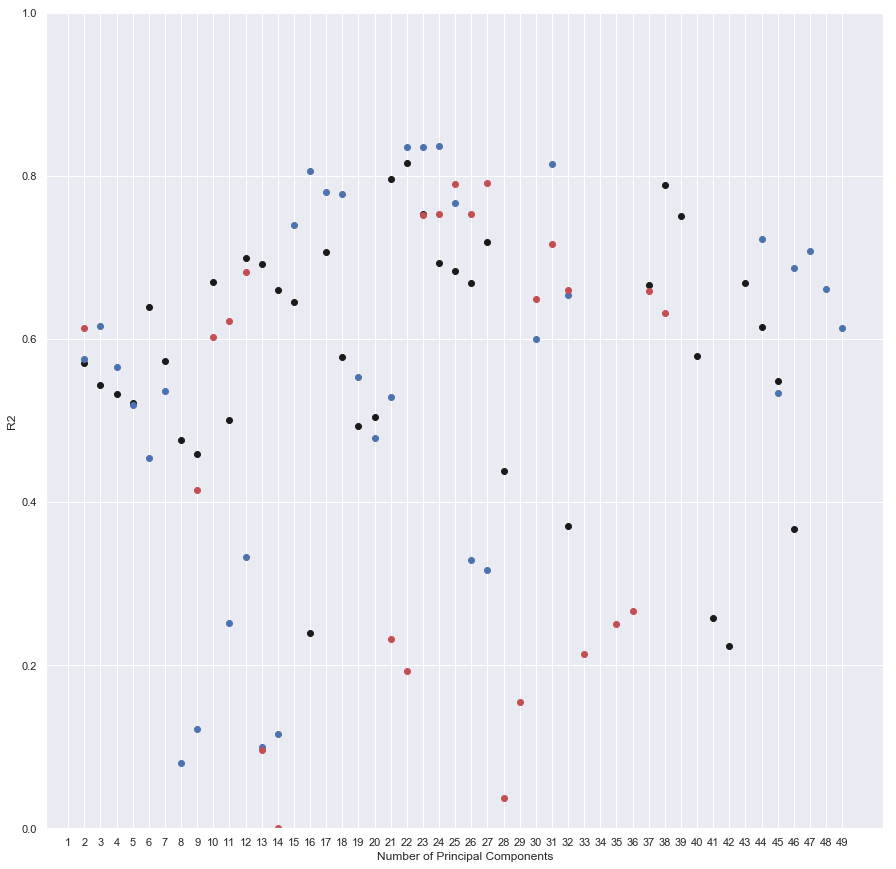

In [155]:
plt.figure(figsize=(15,15))
for i in range(2,50):
    clear_output(wait=True)
    plt.scatter(i,pcr(snv(msc(deriv(dfan,1))),i)[2],c='k')
    plt.scatter(i,pcr(snv(msc(deriv(dfan,2))),i)[2],c='b')
    plt.scatter(i,pcr(snv(msc(deriv(dfan,3))),i)[2],c='r')
    print('Current Progress',np.round(i/50*100,2),'%')
plt.xticks(np.arange(1,50))
plt.xlabel('Number of Principal Components')
plt.ylabel('R2')
plt.ylim(0,1)

In [109]:
def plot_r2_pca(x,n):    
    plt.figure(figsize=(15,15))
    plt.scatter(x.iloc[:,-1],pcr(snv(msc(deriv(x,1))),n)[0])
    plt.title('$R^{2}$ (CV): '+str(pcr(snv(msc(deriv(x,1))),n)[2]))
    plt.xlim(0.5,4)
    plt.ylim(0.5,4)
    plt.xlabel('True Value',fontsize=20)
    plt.ylabel('Predicted Value',fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

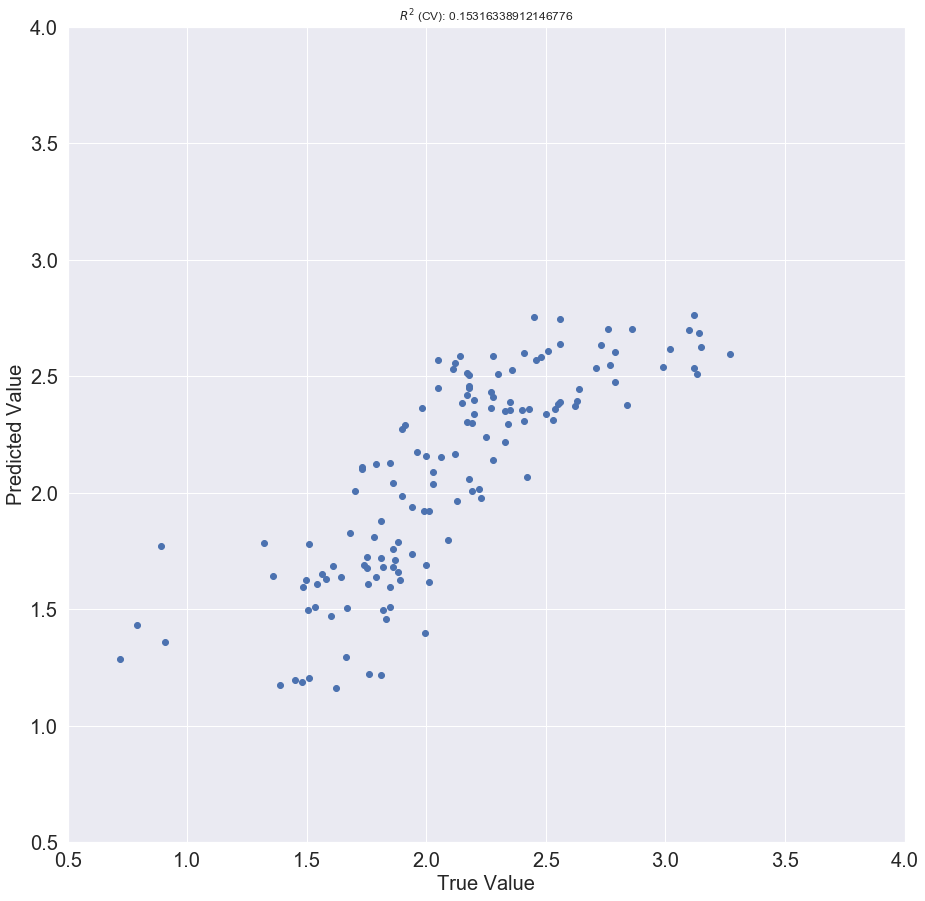

In [110]:
plot_r2_pca(dfan,11)

# Neural Networks

In [343]:
def coeff_determination(y_true, y_pred):
    from tensorflow.keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [344]:
import pathlib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model=tf.keras.Sequential([
    
    layers.Dense(100,activation=tf.nn.relu,input_shape=[len(dfan.columns[:-1])]),
    layers.Dense(64,activation=tf.nn.relu),
    layers.Dense(32,activation=tf.nn.relu),
    layers.Dense(1)
])
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=[coeff_determination])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 100)               22900     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                6464      
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 33        
Total params: 31,477
Trainable params: 31,477
Non-trainable params: 0
_________________________________________________________________


In [355]:
training=model.fit(snv(msc(deriv(dfan.iloc[:130,:-1],1))),dfan.iloc[:130,-1], validation_split=0.2, epochs=500, batch_size= 10,verbose=False)

In [358]:
training.params

{'batch_size': 10,
 'epochs': 500,
 'steps': None,
 'samples': 104,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss',
  'coeff_determination',
  'val_loss',
  'val_coeff_determination']}

# Ridge Regression

In [97]:
import sklearn.linear_model
from sklearn.linear_model import Ridge

In [98]:
from sklearn.preprocessing import StandardScaler

0.8355163923297514


(1, 3.5)

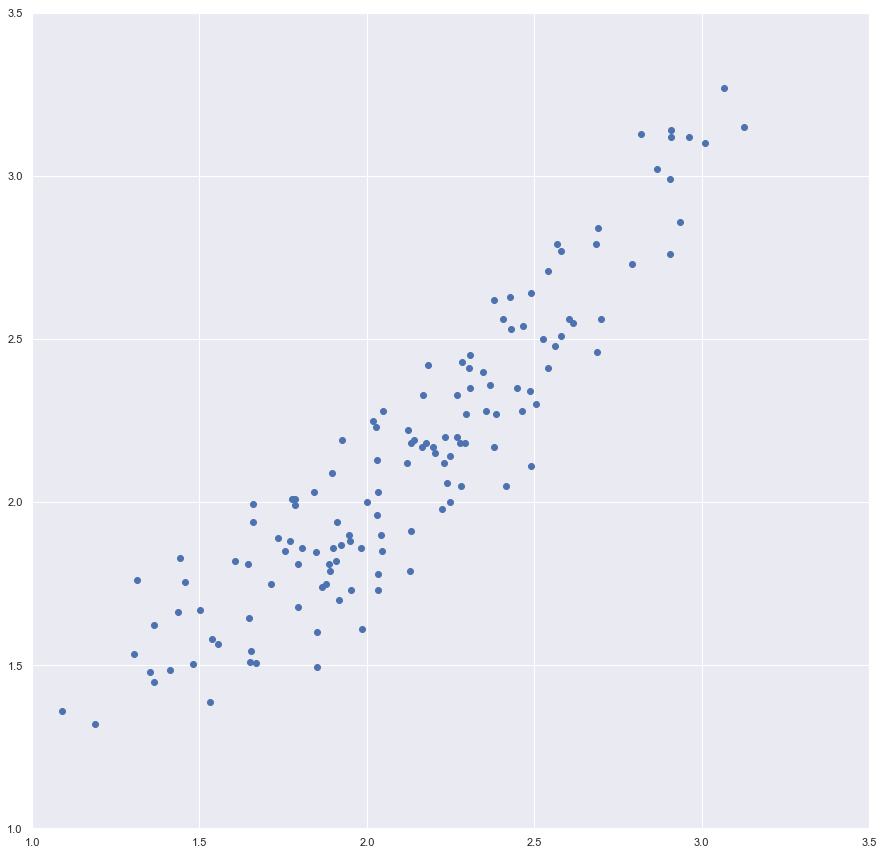

In [102]:
ridge=Ridge(alpha=0.01)

y_cv = cross_val_predict(ridge, snv(msc(deriv(dfan.iloc[:,:-1],1))), dfan.iloc[:,-1], cv=model_selection.LeaveOneOut())

print(r2_score(y_cv,dfan.iloc[:,-1]))

plt.figure(figsize=(15,15))
plt.scatter(y_cv,dfan.iloc[:,-1])
plt.xlim(1,3.5)
plt.ylim(1,3.5)

In [100]:
# Randomized Search for Algorithm Tuning
import numpy as np
from scipy.stats import uniform as sp_rand
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
# load the diabetes datasets

# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(dfan.iloc[:,:-1], dfan.iloc[:,-1])
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D35933B390>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)
0.16672530045959888
0.9661808165935594


C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Adaboost Regressor

In [103]:
from sklearn.ensemble import AdaBoostRegressor

In [104]:
adaboost=AdaBoostRegressor(n_estimators=50,learning_rate=1,loss='square')

In [105]:
y_cv = cross_val_predict(adaboost, snv(msc(deriv(dfan.iloc[:,:-1],1))), dfan.iloc[:,-1], cv=model_selection.LeaveOneOut())

r2_score(dfan['Nicotine %'],y_cv)

0.7273955060491326

(1, 3.5)

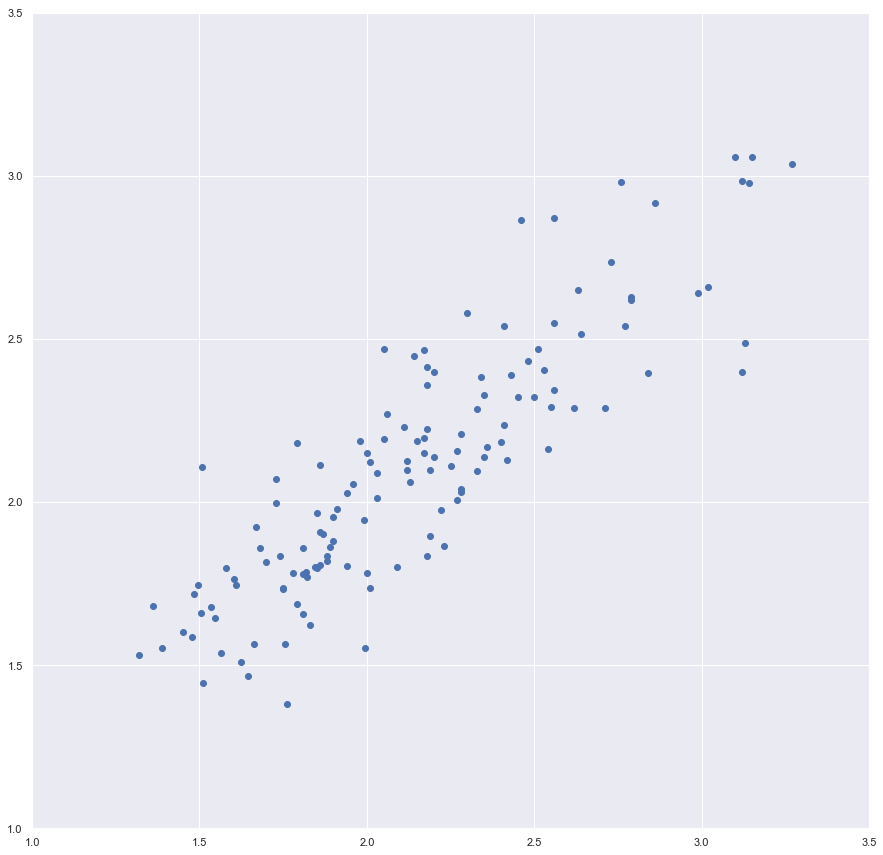

In [106]:
plt.figure(figsize=(15,15))
plt.scatter(dfan.iloc[:,-1],y_cv)
plt.xlim(1,3.5)
plt.ylim(1,3.5)

# Support Vector Regression

In [150]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf',C=0.60)


In [153]:
y_cv = cross_val_predict(regressor, snv(msc(deriv(dfan.iloc[:,:-1],1))), dfan.iloc[:,-1], cv=model_selection.LeaveOneOut())

r2_score(dfan['Nicotine %'],y_cv)

C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\sklearn\svm\

C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\sklearn\svm\

C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\sklearn\svm\

C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Utsav Dutta\Anaconda3\lib\site-packages\sklearn\svm\

0.6421852702855834

(1, 3.5)

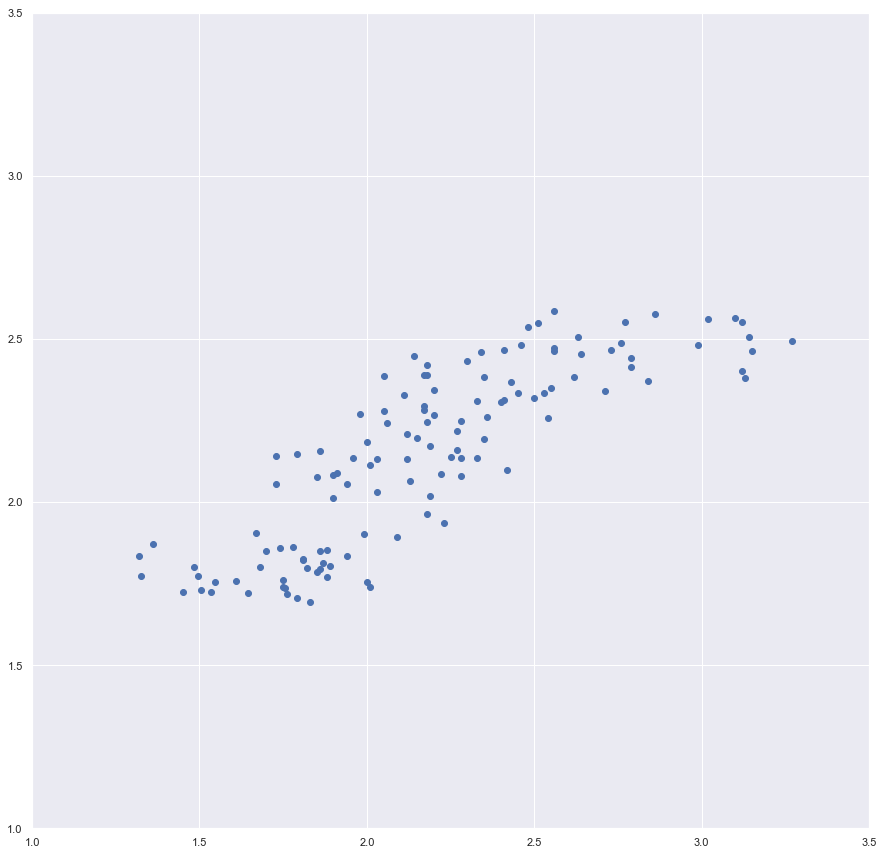

In [154]:
plt.figure(figsize=(15,15))
plt.scatter(dfan.iloc[:,-1],y_cv)
plt.xlim(1,3.5)
plt.ylim(1,3.5)

# Boosted Partial Least Squares

In [217]:
ada=AdaBoostRegressor(PLSRegression(n_components=11),learning_rate=1,loss='linear')

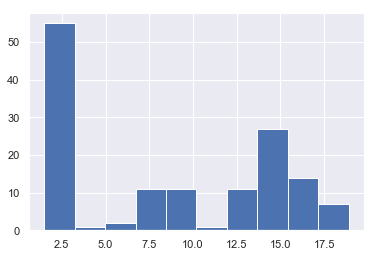

In [270]:
targets['Sugar %'].hist()

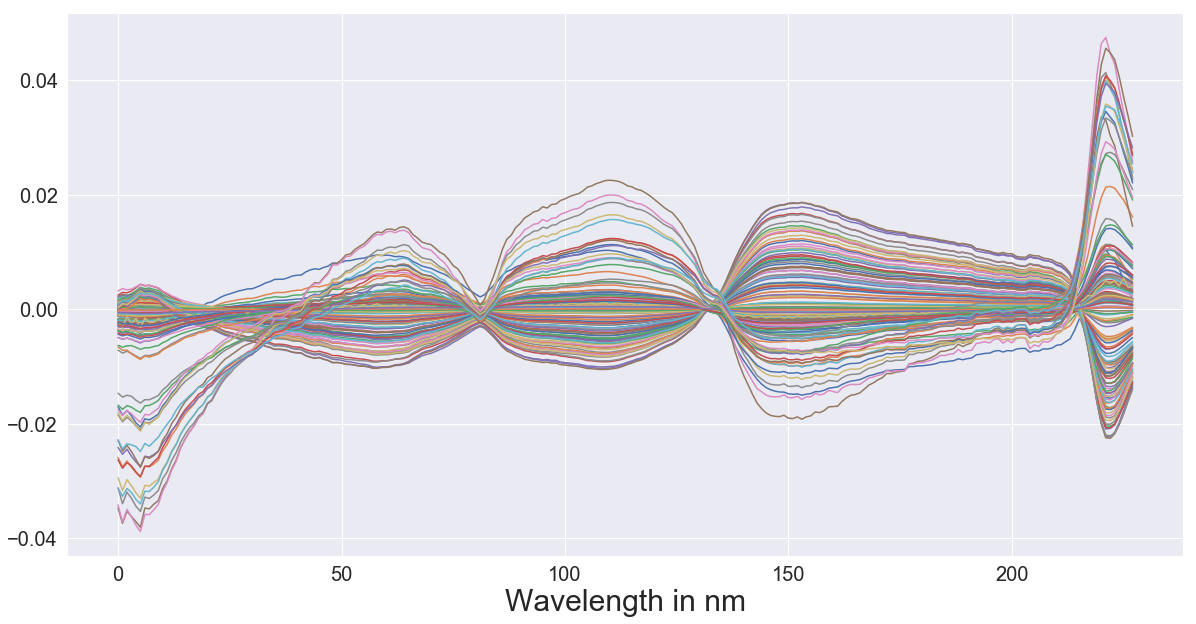

In [280]:
Plot(pd.DataFrame(data=dfan.values-msc(dfan).values))

In [390]:
pls=PLSRegression(n_components=11)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(snv(msc(deriv(dfan.iloc[:,:-1],1))), dfan.iloc[:,-1], test_size = 0.4, random_state = 12)
#xtrain, xtest, ytrain, ytest = train_test_split(dfan.iloc[:,:-1], dfan.iloc[:,-1], test_size = 0.2, random_state = 12)

pls.fit(xtrain,ytrain)

plt.figure(figsize=(15,15))
print(r2_score(ytest,pls.predict(xtest)))
plt.scatter(ytest,pls.predict(xtest))